## File Introduction

This file creates pickle files for **demoing** the models that we made. All files inside the `demo_datasets/` folder have been created from this notebook. Change the argument of `glob.iglob()` to specify the images you want in the dataset. 

In [1]:
# all the imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from PIL import Image, ImageFilter, ImageDraw

## Original Images

In [2]:
original_images = []

new_w = new_h = 128

i = 0
for img_path in glob.iglob('demo_images/*.jpg'):
    # Open image
    img = Image.open(img_path)
    img = img.resize((new_w, new_h), resample=Image.BILINEAR)    
    original_images.append(np.array(img))
    i += 1

original_images = np.array(original_images, dtype='float') / 255.0

4


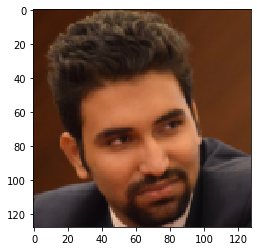

In [7]:
print(len(original_images))
plt.imshow(original_images[3])

In [20]:
with open('../demo_datasets/original-(unobfuscated)-authors.pickle', 'wb') as f:
    pickle.dump(original_images, f)

In [ ]:
del original_images

## Pixelated Images

In [39]:
pixelated_images = []

DOWNSAMPLE_TO = 20 # or 32, or whatever
new_w = new_h = 128

i = 0
for img_path in glob.iglob('demo_images/*.jpg'):

    img = Image.open(img_path)
    img = img.resize((new_w, new_h), resample=Image.BILINEAR)

    # Resize smoothly down to small pixels using BILINEAR interpolation
    small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
    # Scale back up using NEAREST to original size
    pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
    del img

    pixelated_images.append(np.array(pixelated_img))
    
    i += 1

pixelated_images = np.array(pixelated_images, dtype='float') / 255.0

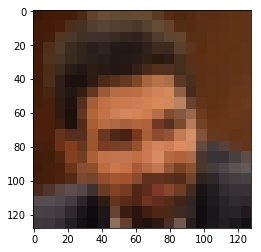

In [40]:
plt.imshow(pixelated_images[0])

In [41]:
with open('../demo_datasets/pixelated-20-authors.pickle', 'wb') as f:
    pickle.dump(pixelated_images, f)

## Blurred Images

In [42]:
# del pixelated_images

blurred_images = []
BLUR_INTENSITY = 2.5

i = 0
for img_path in glob.iglob('demo_images/*.jpg'):
    img = Image.open(img_path)
    img = img.resize((128, 128), resample=Image.BILINEAR)
    
    # Get the blurred image using Gaussian Blur
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
    del img
    
    blurred_images.append(np.array(blurred_img))
    
    i += 1

blurred_images = np.array(blurred_images, dtype='float') / 255.0

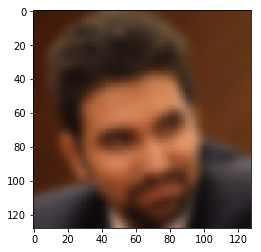

In [43]:
plt.imshow(blurred_images[0])

In [44]:
with open('../demo_datasets/blurred-2.5-authors.pickle', 'wb') as f:
    pickle.dump(blurred_images, f)

## Blocked Images

In [8]:
# code to check overlap - https://codereview.stackexchange.com/questions/31352/overlapping-rectangles

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Rect(object):
    def __init__(self, p1, p2):
        '''Store the top, bottom, left and right values for points 
               p1 and p2 are the (corners) in either order
        '''
        self.left   = min(p1.x, p2.x)
        self.right  = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top    = max(p1.y, p2.y)

def overlap(r1, r2):
    '''Overlapping rectangles overlap both horizontally & vertically
    '''
    return range_overlap(r1.left, r1.right, r2.left, r2.right) and range_overlap(r1.bottom, r1.top, r2.bottom, r2.top)

def range_overlap(a_min, a_max, b_min, b_max):
    '''Neither range is completely greater than the other
    '''
    return (a_min <= b_max) and (b_min <= a_max)

In [9]:
import random

blocked_images = []
new_w = new_h = 128
box_size = 30

i = 0
for img_path in glob.iglob('demo_images/*.jpg'):

    img = Image.open(img_path)
    img = img.resize((new_w, new_h), resample=Image.BILINEAR)
    
    draw = ImageDraw.Draw(img)
    
    # generate non-overlapping boxes on the image
    overlapping = True
    
    while (overlapping):
        # generate coordinates for first box
        p1 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p2 = Point(p1.x + box_size, p1.y + box_size)
        r1 = Rect(p1, p2)
        
        # generate coordinates for second box
        p3 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p4 = Point(p3.x + box_size, p3.y + box_size)
        r2 = Rect(p3, p4)
        
        overlapping = overlap(r1, r2)
    
    # draw the boxes on the image
    draw.rectangle(((r1.left, r1.top), (r1.right, r1.bottom)), fill="black")
    draw.rectangle(((r2.left, r2.top), (r2.right, r2.bottom)), fill="black")
    
    # This line always draws a box in the center of the image. Comment out the above and uncomment this to get "center-blocking"
    # draw.rectangle((((128 - box_size) // 2, (128 - box_size) // 2), ((128 + box_size) // 2, (128 + box_size) // 2)), fill="black")
    
    blocked_images.append(np.array(img))
    
    i += 1

blocked_images = np.array(blocked_images, dtype='float') / 255.0

4


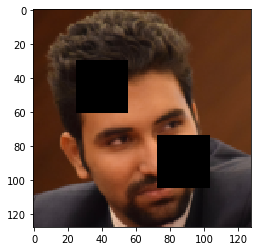

In [10]:
print(len(blocked_images))
plt.imshow(blocked_images[3])

In [6]:
with open('../demo_datasets/blocked-center-authors.pickle', 'wb') as f:
    pickle.dump(blocked_images, f)